# **House Price Prediction using Linear Regression**

---


**Machine learning and ANN_2025-26_IV_B**  
**Name:** Ojasv Singh  
**University Roll No.:** 202401100500120  
**CSIT - B**

---

In [1]:
import kagglehub

path = kagglehub.dataset_download("harlfoxem/housesalesprediction")
print(path)

In [2]:
import os

csv_path=os.path.join(path,"kc_house_data.csv")
print(csv_path)

C:\Users\OJASV\.cache\kagglehub\datasets\harlfoxem\housesalesprediction\versions\1\kc_house_data.csv


In [3]:
import pandas as pd

df=pd.read_csv(csv_path)
print(df.columns)

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')


In [4]:
# Preprocessing

df=df.drop(["id","date","zipcode"],axis=1)

df=pd.get_dummies(df)
print(df.columns)

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')


In [5]:
# Features & Target

y=df["price"]
X=df.drop(["price"],axis=1)

In [6]:
# Train/Test split

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [7]:
# Scaling

from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [8]:
# Model

from sklearn.linear_model import LinearRegression

model=LinearRegression()
model.fit(X_train_scaled,y_train)

LinearRegression()

In [11]:
from sklearn.metrics import mean_absolute_error, r2_score

# Predict (use scaled features to match training)
y_pred = model.predict(X_test_scaled)

# Evaluate
print("MAE:", mean_absolute_error(y_test, y_pred))
print("R2:", r2_score(y_test, y_pred))

MAE: 128157.32046185229
R2: 0.6957298370207377


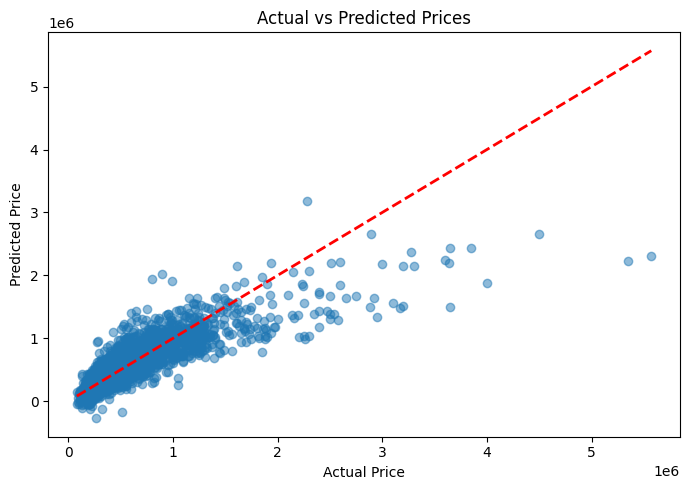

In [12]:
import matplotlib.pyplot as plt

# Actual vs Predicted scatter plot
plt.figure(figsize=(7, 5))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--", linewidth=2)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Prices")
plt.tight_layout()
plt.show()